# Car Evaluation using Decision trees and Random Forests
<hr>

## Decision tree learning

Decision tree classifiers are attractive models of Machine Learning as they emphasize on interpretability.
Like the name decision tree suggests, we can think of this model as breaking down our data by making decisions based on asking a series of questions. 

Let's consider the following example where we use a decision tree to decide upon an activity on a particular day:

<img src="images/decisiontrees.png">

[[Image source]]( https://github.com/rasbt/python-machine-learning-book/tree/master/images/image_gallery)

The decision tree model learns a series of questions to infer the class labels of the samples according to the features in our training set. Although the preceding figure illustrated the concept of a decision tree based on categorical variables, the same concept applies to our features. Using the decision algorithm, we start at the tree root and split the data on the feature that results in the largest information gain (IG). In an iterative process, we can then repeat this splitting procedure at each child node until the leaves are pure. This means that the samples at each node all belong to the same class. In practice, this can result in a very deep tree with many nodes, which can easily lead to overfitting. Thus, we typically want to prune the tree by setting a limit for the maximal depth of the tree.

### Parameters in decision trees

One of the most important features for a decision tree is the stopping criterion.
As a tree is built, the final few decisions can often be somewhat random and rely
on only a small number of samples to make their decision. Using such specific nodes
can result in overfitting of the training data. Instead, a stopping
criterion can be used to ensure that the decision tree does not reach this exactness.
Instead of using a stopping criterion, the tree could be created in full and then
pruned. This pruning process removes nodes that do not provide much
information to the overall process. The decision tree implementation in scikit-learn provides a method to stop the
building of a tree using the following options:
    
* min_samples_split: This specifies how many samples are needed in order to create a new node in the decision tree
* min_samples_leaf: This specifies how many samples must be resulting from a node for it to stay

The first dictates whether a decision node will be created, while the second dictates
whether a decision node will be kept.
Another parameter for decision tress is the criterion for creating a decision.
Gini impurity and Information gain are two popular ones:

* Gini impurity: This is a measure of how often a decision node would incorrectly predict a sample's class
* Information gain: This uses information-theory-based entropy to indicate how much extra information is gained by the decision node

### Building a decision tree

Decision trees can build complex decision boundaries by dividing the feature space into rectangles. Generally Decision trees with lower heights are preferred over deeper trees, since the deeper the decision tree, the more complex the decision boundary becomes, which can easily result in overfitting. Using scikit-learn, we will now train a decision tree to evaluation the condition of a car.

## Dataset

To implement our Decision Tree Classifier we will use The Car Evaluation Database. It contains examples with the structural information removed, i.e., it directly relates CAR to the six input attributes: buying, maint, doors, persons, lug_boot, safety. 
Basically, we have to build a classifier to classify a car as 'Unacceptable', 'Acceptable', 'Good' and 'Very Good' based on the attributes. 

The different attributes values are given as follows:

1. **buying**: vhigh, high, med, low. 
2. **maint**: vhigh, high, med, low. 
3. **doors**: 2, 3, 4, 5, more. 
4. **persons**: 2, 4, more. 
5. **lug_boot**: small, med, big. 
6. **safety**: low, med, high. 

You can download the dataset from here : https://archive.ics.uci.edu/ml/datasets/Car+Evaluation

Once downloaded, we can move on with the code.


Firstly, we manage our imports:

In [5]:
import os
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import pandas as pd
import numpy as np
from sklearn.cross_validation import train_test_split
from sklearn import cross_validation, metrics
from sklearn.ensemble import RandomForestClassifier
from time import time
from sklearn import preprocessing
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_auc_score , classification_report
from sklearn.grid_search import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import precision_score, recall_score, accuracy_score, classification_report

Next we load our dataset into a pandas dataframe. We specify the column names before-hand.

In [45]:
# read .csv from provided dataset
csv_filename="car.data"

# df=pd.read_csv(csv_filename,index_col=0)
df=pd.read_csv(csv_filename,
              names=["Buying", "Maintenance" , "Doors" , "Persons" , "Lug-Boot" , "Safety", "Class"])

In [46]:
df.head()

,Buying,Maintenance,Doors,Persons,Lug-Boot,Safety,Class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


Since the target class labels are strings, we'll have to convert in a format that our classifier would understand. For this we would use the LabelEncoder class of Scikit-Learn module 'preprocessing'.  This converts our class labels into [1,2,3,4] where the integers would correspond to the respective class.

In [47]:
#Convert car-class labels to numbers
le = preprocessing.LabelEncoder()
df['Class'] = le.fit_transform(df.Class)

In [48]:
df['Class'].unique()

array([2, 0, 3, 1], dtype=int64)

In [49]:
features = list(df.columns)
features.remove('Class')

We define our features. Next we convert the dataset into binarized form. This makes the raw textual data which contains categorized values like vhigh etc and converts them into a dummy format better understandable to our classifier. We use the pd.get_dummies function to do it for us.

In [50]:
for f in features:
    #Get binarized columns
    df[f] = pd.get_dummies(df[f])

Now our data looks like this:

In [51]:
df.head()

,Buying,Maintenance,Doors,Persons,Lug-Boot,Safety,Class
0,0,0,1,1,0,0,2
1,0,0,1,1,0,0,2
2,0,0,1,1,0,1,2
3,0,0,1,1,0,0,2
4,0,0,1,1,0,0,2


In [52]:
X = df[features]
y = df['Class']

We split the dataset into 60% training and 40% testing sets.

In [53]:
# split dataset to 60% training and 40% testing
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.4, random_state=0)

In [54]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

### Finding the Feature importances with forests of trees
This examples shows the use of forests of trees to evaluate the importance of features on an artificial classification task. The red bars are the feature importances of the forest, along with their inter-trees variability.

Feature ranking:
1. feature 3 - Persons (0.536901) 
2. feature 5 - Safety (0.318936) 
3. feature 0 - Buying (0.048373) 
4. feature 4 - Lug-Boot (0.047934) 
5. feature 1 - Maintenance (0.027871) 
6. feature 2 - Doors (0.019986) 


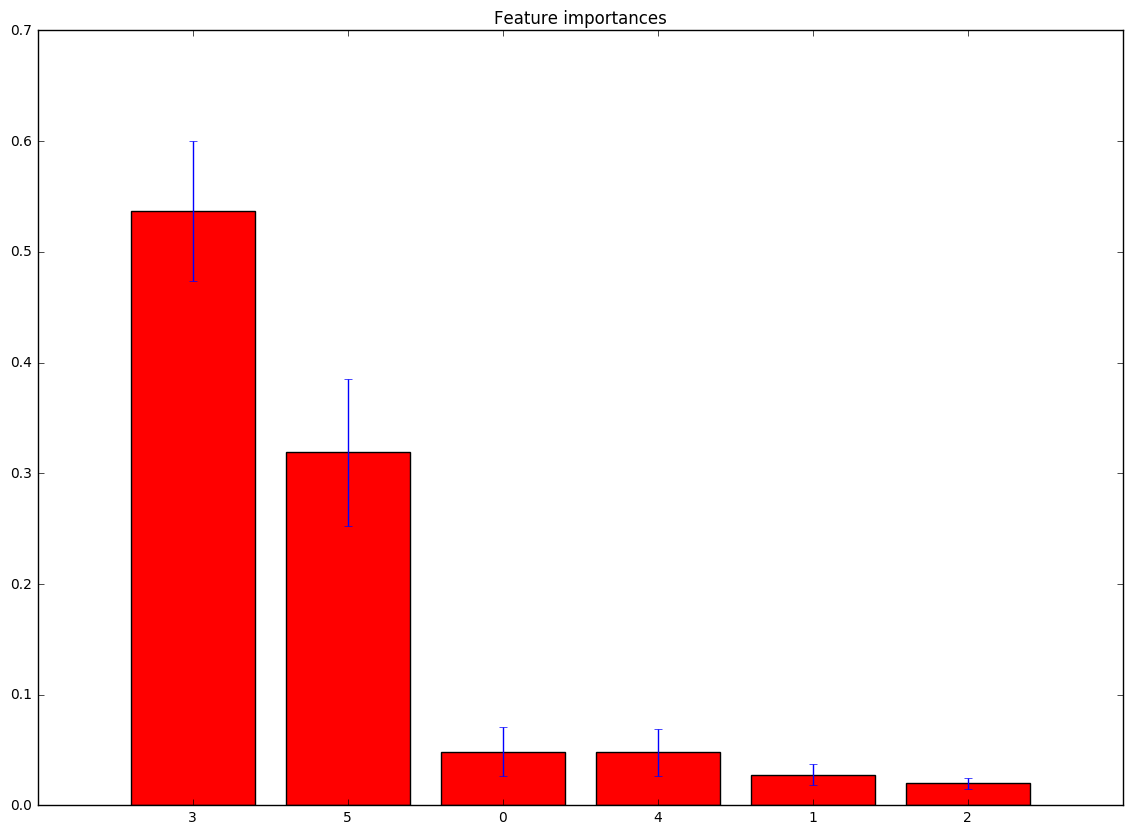

In [18]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

from sklearn.ensemble import ExtraTreesClassifier

# Build a classification task using 3 informative features

# Build a forest and compute the feature importances
forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)

forest.fit(X, y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d - %s (%f) " % (f + 1, indices[f], features[indices[f]], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure(num=None, figsize=(14, 10), dpi=80, facecolor='w', edgecolor='k')
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

In [19]:
for f in range(5):
    print("%d. feature %d - %s (%f)" % (f + 1, indices[f], features[indices[f]] ,importances[indices[f]]))

1. feature 3 - Persons (0.536901)
2. feature 5 - Safety (0.318936)
3. feature 0 - Buying (0.048373)
4. feature 4 - Lug-Boot (0.047934)
5. feature 1 - Maintenance (0.027871)


In [20]:
best_features = []
for i in indices[:5]:
    best_features.append(features[i])

Plot the top 5 feature importances of the forest

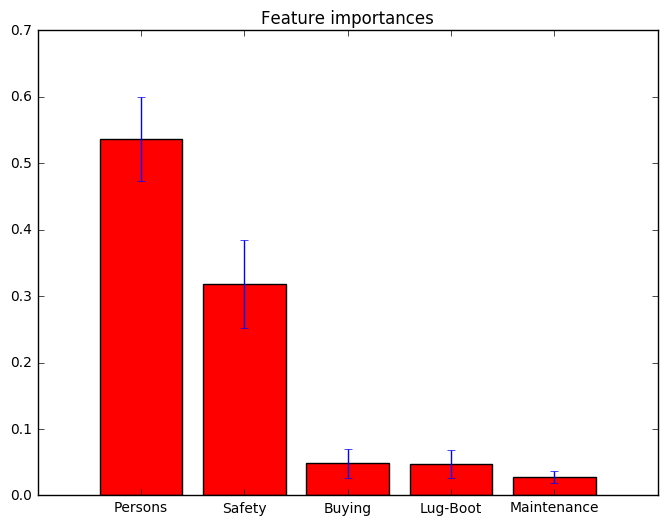

In [21]:
plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.title("Feature importances")
plt.bar(range(5), importances[indices][:5], 
       color="r",  yerr=std[indices][:5], align="center")
plt.xticks(range(5), best_features)
plt.xlim([-1, 5])
plt.show()

Next we implement our DecisionTreeClassifier:

In [34]:
t0=time()
print ("DecisionTree")

dt = DecisionTreeClassifier(min_samples_split=20,random_state=99)
# dt = DecisionTreeClassifier(min_samples_split=20,max_depth=5,random_state=99)

clf_dt=dt.fit(X_train_std,y_train)

print ("Acurracy: ", clf_dt.score(X_test_std,y_test))
t1=time()
print ("time elapsed: ", t1-t0)

DecisionTree
Acurracy:  0.75289017341
time elapsed:  0.0060002803802490234


As you can see, we achieved an accuracy of about 75% on the test set.

### Cross validation for Decision Trees:

In [35]:
tt0=time()
print ("cross result========")
scores = cross_validation.cross_val_score(dt, X, y, cv=3)
print (scores)
print (scores.mean())
tt1=time()
print ("time elapsed: ", tt1-tt0)

cross result========
[ 0.67071057  0.68923611  0.75826087]
0.7060691842
time elapsed:  0.026001453399658203


Thus the overall accuracy of 70% helps us to better understand our classifier. It is comparatively low, but still far better than random guessing at 50%. One reason that the accuracy is a bit on the low sized might be the  small size of the dataset. Several other factors might affect the accuracy.

A nice feature in scikit-learn is that it allows us to export the decision tree as a .dot file after training, which we can visualize using the GraphViz program. This program is freely available at http://www.graphviz.org and supported by Linux, Windows, and Mac OS X.

In [44]:
from sklearn.tree import export_graphviz

export_graphviz(tree, 
                out_file='tree.dot', 
                feature_names=['Persons', 'Safety'])

After we have installed GraphViz on our computer, we can convert the tree.dot file into a PNG file by executing the following command from the command line in the location where we saved the tree.dot file:

> `dot -Tpng tree.dot -o tree.png`

<img src="images/tree.png">

## Combining weak to strong learners via random forests

Random forests have gained huge popularity in applications of machine learning during the last decade due to their good classification performance, scalability, and ease of use. Intuitively, a random forest can be considered as an ensemble of decision trees. The idea behind ensemble learning is to combine weak learners to build a more robust model, a strong learner, that has a better generalization error and is less susceptible to overfitting. The random forest algorithm can be summarized in four simple steps:

1. Draw a random bootstrap sample of size n (randomly choose n samples from the training set with replacement).
2. Grow a decision tree from the bootstrap sample. At each node:
    * Randomly select d features without replacement.
    * Split the node using the feature that provides the best split according to the objective function, for instance, by maximizing the information gain.
    
3. Repeat the steps 1 to 2 k times.
4. Aggregate the prediction by each tree to assign the class label by majority vote. 

There is a slight modification in step 2 when we are training the individual decision trees: instead of evaluating all features to determine the best split at each node, we only consider a random subset of those.

Although random forests don't offer the same level of interpretability as decision trees, a big advantage of random forests is that we don't have to worry so much about choosing good hyperparameter values. We typically don't need to prune the random forest since the ensemble model is quite robust to noise from the individual decision trees. The only parameter that we really need to care about in practice is the number of trees k (step 3) that we choose for the random forest. Typically, the larger the number of trees, the better the performance of the random forest classifier at the expense of an increased computational cost.

Via the sample size n of the bootstrap sample, we control the bias-variance tradeoff of the random forest. By choosing a larger value for n, we decrease the randomness and thus the forest is more likely to overfit. On the other hand, we can reduce the degree of overfitting by choosing smaller values for n at the expense of the model performance. In most implementations, including the RandomForestClassifier implementation in
scikit-learn, the sample size of the bootstrap sample is chosen to be equal to the number of samples in the original training set, which usually provides a good
bias-variance tradeoff. For the number of features d at each split, we want to choose a value that is smaller than the total number of features in the training set. A reasonable default that is used in scikit-learn and other implementations is d = sqroot(m), where m is the number of features in the training set.

#### Parameters in Random forests

The Random forest implementation in scikit-learn is called
RandomForestClassifier, and it has a number of parameters. As Random forests
use many instances of DecisionTreeClassifier, they share many of the same
parameters such as the criterion (Gini Impurity or Entropy/Information Gain),
max_features, and min_samples_split.
Also, there are some new parameters that are used in the ensemble process:

* n_estimators: This dictates how many decision trees should be built. A higher value will take longer to run, but will (probably) result in a higher accuracy.
* oob_score: If true, the method is tested using samples that aren't in the random subsamples chosen for training the decision trees.
* n_jobs: This specifies the number of cores to use when training the decision trees in parallel.

The scikit-learn package uses a library called Joblib for in-built parallelization.
This parameter dictates how many cores to use. By default, only a single core is
used—if you have more cores, you can increase this, or set it to -1 to use all cores.

### Applying Random forests

Random forests in scikit-learn use the estimator interface, allowing us to use almost
the exact same code as before to do cross fold validation:

In [56]:
t2=time()
print ("RandomForest")
rf = RandomForestClassifier(n_estimators=100,n_jobs=-1)
clf_rf = rf.fit(X_train,y_train)
print ("Acurracy: ", clf_rf.score(X_test,y_test))
t3=time()
print ("time elapsed: ", t3-t2)

RandomForest
Acurracy:  0.75289017341
time elapsed:  0.5240299701690674


In [57]:
tt2=time()
print ("cross result========")
scores = cross_validation.cross_val_score(rf, X, y, cv=3)
print (scores)
print (scores.mean())
tt3=time()
print ("time elapsed: ", tt3-tt2)

cross result========
[ 0.67764298  0.67013889  0.74608696]
0.697956275449
time elapsed:  1.5300874710083008


Using the preceding code, we trained a random forest from 100 decision trees via the n_estimators parameter and used the entropy criterion as an impurity measure to split the nodes. Although we are growing a very small random forest from a very small training dataset, we used the n_jobs parameter for demonstration purposes, which allows us to parallelize the model training using multiple cores of our computer (here, -1 which means all cores will be used).

In this chapter, we learned about ensemble methods such as random forests don't require much parameter tuning and don't overfit so easily as decision trees, which makes it an attractive model for many practical problem domains. 


____